In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
def fetch_data(dept):
  data = {dept[i]:None for i in range(len(dept))}
  for dep in dept:
    response = requests.get(f'http://www.iitkgp.ac.in/department/{dep}/faculties')
    soup = BeautifulSoup(response.content, 'html.parser')
    research = soup.find_all('blockquote', class_='blockquote')
    names = soup.find_all('div', class_='col-lg-5')

    faculty = []
    for n in names:
      if n.h3 == None:
        continue
      faculty.append(n.h3.contents[0])

    research_areas = []
    for block in research:
        areas = []
        ul_tag = block.find('ul')
        for li_tag in ul_tag.find_all('li'):
            areas.append(li_tag.text.strip())
        research_areas.append(areas)

    data[dep] = {faculty[i]:research_areas[i] for i in range(len(faculty))}
  
  return data

In [ ]:
dept = ['AE', 'AG','AR','CD','DH','EX','AI','FN','CH','CE','CS','EE','EC','ES','EF','GS','ME','MT','MI','NA','ID','RT','WM','SL','RE']

In [ ]:
base = fetch_data(dept)

In [ ]:
type(base)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



dict

In [ ]:
import json
with open("Proff_Info.txt", "w") as fp:
    json.dump(base, fp)  # encode dict into JSON


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Open the file for reading
with open("Proff_Info.txt", "r") as fp:
    # Load the dictionary from the file
    person_dict = json.load(fp)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
person_dict

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'AE': {'Akshay Prakash': ['Computational Fluid Dynamics (CFD)',
   'Lattice Boltzmann Method',
   'Hydrodynamics Stability',
   'high order schemes',
   'Computational Fluid Dynamics'],
  'Amardip Ghosh': ['Chemically Reacting flows',
   'Cardiovascular Fluid Mechanics',
   'High Speed Reacting Flows',
   'Combustion Instability'],
  'Anup Ghosh': ['Aircraft Structures',
   'Composite and Smart Structures',
   'Micro Air Vehicle',
   'UAV'],
  'Arnab Roy': ['Computational Fluid Dynamics',
   'Low Reynolds No. Aerodynamics',
   'Single and Multiphase Fluid Dynamics',
   'Flapping wing aerodynamics',
   'Aerospace Propulsion'],
  'Bhrigu Nath Singh': ['Smart and Composite Structures',
   'Uncertainty quantification',
   'Dynamics and Aeroelasticity',
   'Mechanics of Composites',
   'Structural Health Monitoring'],
  'Chetankumar Sureshbhai Mistry': ['Design of Turbomachines',
   'Turbomachines performance augmentation',
   'Experimental & CFD study of turbomachine',
   'Experimental ae

In [ ]:
len(base.keys())

25

In [ ]:
count=0
for key in base.keys():
  for proff in base[key]:
    count=count+1

In [ ]:
count

408

In [ ]:
list_of_research_areas=[]
for dept in base:
  for proff in base[dept]:
    for research in base[dept][proff]:
      list_of_research_areas.append(research)

In [ ]:
len(list_of_research_areas)

1545

# Clustering of Same Research Topics

In [ ]:
import gensim
from gensim.utils import simple_preprocess

In [ ]:
!pip install pyLDAvis

In [ ]:
!python -m spacy download en_core_web_sm
import spacy

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

In [ ]:
def remove_punctuations_and_lower_case(texts):
  new_texts=[]
  for x in texts:
    x=re.sub('[,\.!?]', '', x)
    x=x.lower()
    new_texts.append(x)
  return new_texts


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations  

In [ ]:
# Load the regular expression library
import re

# Remove punctuation
list_of_research_areas= remove_punctuations_and_lower_case(list_of_research_areas)


In [ ]:
data_words = list(sent_to_words(list_of_research_areas))


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_trigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

data_lemmatized= data_words_trigrams


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_lemmatized

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import time
coh_values = {}
# get the start time
st = time.time()
topics=[2,4,6,8,10,12,14,16,18,20,22,24,26]
topics=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,100]

for k in topics:

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    print('for k = ',k,'  Coherence Score is : ', coherence_lda)
    coh_values[k]=coherence_lda

coh_values  

# get the execution time
et=time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


for k =  5   Coherence Score is :  0.677294088829268
for k =  10   Coherence Score is :  0.6137339615274847
for k =  15   Coherence Score is :  0.6247622086505535
for k =  20   Coherence Score is :  0.6402445485159646
for k =  25   Coherence Score is :  0.6758244473013866
for k =  30   Coherence Score is :  0.6832221653311972
for k =  35   Coherence Score is :  0.7165665266708133
for k =  40   Coherence Score is :  0.7201062983409843
for k =  45   Coherence Score is :  0.7138378310858676
for k =  50   Coherence Score is :  0.7146356642921508
for k =  55   Coherence Score is :  0.7147058560251235
for k =  60   Coherence Score is :  0.713059768544168
for k =  65   Coherence Score is :  0.7132196546040727
for k =  70   Coherence Score is :  0.7132912113619382
for k =  75   Coherence Score is :  0.7108454322508533
for k =  80   Coherence Score is :  0.7134802362799186
for k =  85   Coherence Score is :  0.7115154358109481
for k =  90   Coherence Score is :  0.7122963204415051
for k =  100 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


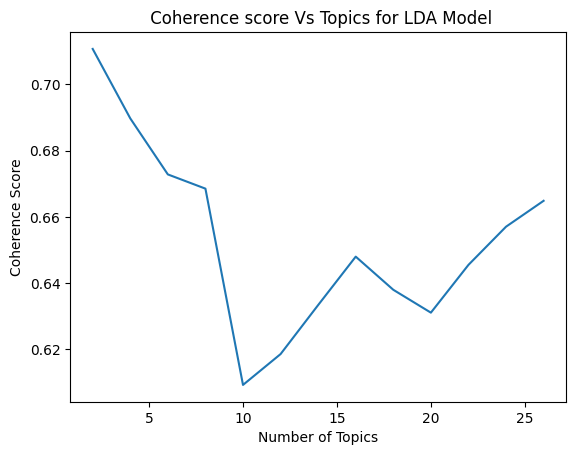

In [ ]:
import matplotlib.pylab as plt

myList = coh_values.items()
myList = sorted(myList)
x, y = zip(*myList)

plt.plot(x, y)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title(' Coherence score Vs Topics for LDA Model')
plt.show()



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


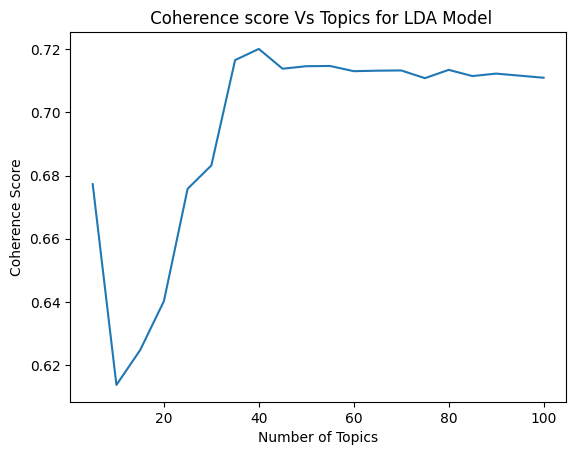

In [ ]:
import matplotlib.pylab as plt

myList = coh_values.items()
myList = sorted(myList)
x, y = zip(*myList)

plt.plot(x, y)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title(' Coherence score Vs Topics for LDA Model')
plt.show()

In [ ]:
num_topics = 40

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
35     0.072616  0.032327       1        1  7.031993
20    -0.005907 -0.024263       2        1  6.124035
15     0.005797 -0.026470       3        1  5.966457
22    -0.041769  0.054800       4        1  5.840394
1     -0.002281 -0.015079       5        1  5.740535
23    -0.021889  0.000807       6        1  5.681368
36     0.002901 -0.011373       7        1  5.505352
16    -0.005204 -0.005417       8        1  4.916711
31    -0.000354 -0.008631       9        1  4.594123
14    -0.000821 -0.002341      10        1  4.033726
3     -0.000463 -0.006616      11        1  3.874043
30    -0.003558 -0.002897      12        1  3.232828
26    -0.004732  0.001998      13        1  3.060035
0     -0.009806  0.006991      14        1  2.949626
29     0.000138 -0.000624      15        1  2.192529
11     0.000724 -0.001124      16        1  2.183447
8     -0.000161 -0.002325      17        1  2.179292
19     0.000389 -0.001011      18        1  1.731951
17    -0.000793 -0.002778      19        1  1.604666
32     0.000150 -0.000449      20        1  1.479953
12     0.001273  0.000608      21        1  1.427662
21     0.000728 -0.000172      22        1  1.372187
25     0.000183 -0.000325      23        1  1.369241
13    -0.000178 -0.000274      24        1  1.332921
38     0.001133  0.001038      25        1  1.320341
10    -0.002905  0.004679      26        1  1.320127
4      0.000555 -0.000503      27        1  1.267181
5      0.001090 -0.001438      28        1  1.213506
7      0.001025  0.000850      29        1  1.132903
18     0.000866  0.000269      30        1  1.037630
24     0.001466  0.000697      31        1  1.014482
37     0.000524  0.000851      32        1  0.997692
39     0.001098  0.001072      33        1  0.868409
2      0.001494  0.000303      34        1  0.851865
34     0.001114  0.000780      35        1  0.821758
9      0.001084  0.001024      36        1  0.637710
27     0.001104  0.001138      37        1  0.637708
28     0.001141  0.001277      38        1  0.590475
33     0.001050  0.001429      39        1  0.463307
6      0.001176  0.001171      40        1  0.399829, topic_info=               Term       Freq      Total Category  logprob  loglift
72        materials  22.000000  22.000000  Default  30.0000  30.0000
109         systems  14.000000  14.000000  Default  29.0000  29.0000
169        analysis   8.000000   8.000000  Default  28.0000  28.0000
3             fluid  12.000000  12.000000  Default  27.0000  27.0000
178     engineering  12.000000  12.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
1003       property   0.013999   3.443064  Topic40  -7.0825   0.0168
0               cfd   0.013999   3.398671  Topic40  -7.0825   0.0298
1     computational   0.013999  10.652115  Topic40  -7.0825  -1.1126
2          dynamics   0.013999  12.136964  Topic40  -7.0825  -1.2431
3             fluid   0.013999  12.910574  Topic40  -7.0825  -1.3049

[1579 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
886       5  0.287011         acoustics
899       4  0.455912          additive
529       1  0.690186          advanced
1120      7  0.288737     affordability
911       4  0.275160             aided
...     ...       ...               ...
71       13  0.271035  wave_propagation
1053     11  0.279962             whole
99        3  0.219393              wind
99        5  0.219393              wind
99        8  0.219393              wind

[321 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[36, 21, 16, 23, 2, 24, 37, 17, 32, 15, 4, 31, 27, 1, 30, 12, 9, 20, 18, 33, 13, 22, 26, 14, 39, 11, 5, 6, 8, 19, 25, 38, 40, 3, 35, 10, 28, 29, 34, 7])

In [ ]:
import pandas as pd
lda=lda_model
lda_scores = lda[corpus]

all_topics_csr = gensim.matutils.corpus2csc(lda_scores )
all_topics_numpy = all_topics_csr.T.toarray()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
all_topics_numpy.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1546, 40)

In [ ]:
dict_topic_numbers_count={}
dict_actual_topics={}

for text_prob,actual_topic in zip(all_topics_numpy,list_of_research_areas):
    text_prob=list(text_prob)
    maxpos = text_prob.index(max(text_prob))
    try:                         
        dict_topic_numbers_count[maxpos+1]=dict_topic_numbers_count[maxpos+1]+1
        dict_actual_topics[maxpos+1].append(actual_topic)
    except KeyError:
        dict_topic_numbers_count[maxpos+1]=0
        dict_topic_numbers_count[maxpos+1]=dict_topic_numbers_count[maxpos+1]+1
        dict_actual_topics[maxpos+1]=[]
        dict_actual_topics[maxpos+1].append(actual_topic)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dict_topic_numbers_count

In [ ]:
dict_actual_topics

# Clustering Using Bert

In [ ]:
!pip install bertopic[visualization] --quiet


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 48.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = BERTopic(calculate_probabilities=True,language="english")
topics, probs = model.fit_transform(list_of_research_areas)

## Reduce the Number of Topics to our Own Number.
model=model.reduce_topics(list_of_research_areas, nr_topics=30)
topics, probs = model.fit_transform(list_of_research_areas)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## Reduce the Number of Topics to our Own Number.
model=model.reduce_topics(list_of_research_areas, nr_topics=35)
topics, probs = model.fit_transform(list_of_research_areas)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
model.get_topic_freq()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic,Count
0,-1,250
1,0,168
2,1,144
3,2,70
4,3,69
5,4,59
6,5,59
7,6,59
8,7,54
9,8,47


In [ ]:
# Understand the topics in Topic Number 1.
model.get_topic(1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('fluid', 0.1492859032510119),
 ('computational', 0.10509612349022474),
 ('dynamics', 0.08905097288986336),
 ('structure', 0.07507474565966228),
 ('interaction', 0.06758022320795615),
 ('transport', 0.052515287970195224),
 ('advanced', 0.05164631168907989),
 ('multiphase', 0.049348953470052574),
 ('mechanics', 0.0473366866580371),
 ('microfluidics', 0.04683880673420651)]

In [ ]:
model.visualize_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
model.visualize_barchart(top_n_topics=35)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#predict newTopic:

dict_of_same_topics={}

count=0
for actual_topic in list_of_research_areas:
  topic_number,probs_array=model.find_topics(actual_topic)

  # Assigning the topic which is Most Likely
  topic_number=topic_number[0]
  try:
    dict_of_same_topics[topic_number].append(actual_topic)
  except KeyError:
    dict_of_same_topics[topic_number]=[]
    dict_of_same_topics[topic_number].append(actual_topic)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
dict_map={}
["Advanced Battery Management Systems for Electric Vehicles.",


In [ ]:
myDict=dict_of_same_topics

myKeys = list(myDict.keys())
myKeys.sort()
sorted_dict = {i: myDict[i] for i in myKeys}

dict_of_same_topics=sorted_dict

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
Topics_names_list=["Advanced Battery Management Systems for Electric Vehicles"," Artificial Intelligence and Machine Learning", "Computational Fluid Dynamics and Fluid-Structure Interaction.", "Renewable Energy Systems and Integration" ,"Advanced Manufacturing and Food Processing.","Integrated Water Resources Management and Climate Change Adaptation in River Basins.", "Materials Science and Engineering",
 "Materials, Composites and Polymers","Water Management and Environmental Engineering","Communication Networks and Systems", "Urban and Regional Planning.","Reliability and Health Monitoring of Industrial Systems","Bioactive Extraction, Encapsulation and Valorization", "Coming Soon",
 "Advancements in Pavement and Material Engineering","Geotechnical and Geomechanical Engineering","Marine and Aquacultural Engineering","Sensor Networks and Internet of Things","Signal Processing and Pattern Recognition","Heat Transfer and Cooling Techniques in Various Applications",
 "Transportation Planning, Safety, and Behavior Analysis","Machine Learning and Algorithmic Design","Big Data Analytics and Information Retrieval in Various Domains", "Multidisciplinary Biomedical Informatics","Computer-Aided Design and Systems Engineering",
 "Sustainable Precision Agriculture","Vibration and Noise Control for Mechanical Systems","Microwave and Radar Technologies", "Cybersecurity and Information Protection","Nonlinear Dynamics and Control Engineering","Molecular Modeling and Process Simulation",
 "Photonics and Optics","Combustion Science and Engineering ","Aerodynamics and Flight Dynamics"," Surface Science and Engineering"]




/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
dict_of_same_topics

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{-1: ['electric vehicles: powertrain & battery management',
  'rechargeable batteries',
  'rechargeable batteries',
  'electric vehicles: powertrain & battery management',
  'electric vehicles: powertrain & battery management',
  'electric vehicles: powertrain & battery management',
  'performance evaluation',
  'sodium ion batteries',
  'systems and control'],
 0: ['artificial intelligence',
  'machine design',
  'ai ml cognitive science',
  'artificial intelligence',
  'natural language pocessing',
  'ai ml cognitive science',
  'computer assisted language learning',
  'natural language pocessing',
  'natural language pocessing',
  'artificial intelligence',
  'artificial intelligence',
  'natural language pocessing',
  'artificial intelligence',
  'computer vision',
  'artificial intelligence',
  'artificial intelligence',
  'natural language pocessing',
  'ai ml cognitive science',
  'human computer interaction',
  'computational intelligence',
  'computer vision',
  'artificial in

In [ ]:
len(Topics_names_list)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



35

In [ ]:
dict_with_topic_Names={}
for key, topic in zip(dict_of_same_topics.keys(),Topics_names_list):
  dict_with_topic_Names[topic]=dict_of_same_topics[key]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
dict_with_topic_Names

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'Advanced Battery Management Systems for Electric Vehicles': ['electric vehicles: powertrain & battery management',
  'rechargeable batteries',
  'rechargeable batteries',
  'electric vehicles: powertrain & battery management',
  'electric vehicles: powertrain & battery management',
  'electric vehicles: powertrain & battery management',
  'performance evaluation',
  'sodium ion batteries',
  'systems and control'],
 ' Artificial Intelligence and Machine Learning': ['artificial intelligence',
  'machine design',
  'ai ml cognitive science',
  'artificial intelligence',
  'natural language pocessing',
  'ai ml cognitive science',
  'computer assisted language learning',
  'natural language pocessing',
  'natural language pocessing',
  'artificial intelligence',
  'artificial intelligence',
  'natural language pocessing',
  'artificial intelligence',
  'computer vision',
  'artificial intelligence',
  'artificial intelligence',
  'natural language pocessing',
  'ai ml cognitive science'

In [ ]:
import pickle

In [ ]:
# save dictionary to pickle file
with open("Research_Domain_Research_Area_Dictionary.pickle", "wb") as file:
    pickle.dump(dict_with_topic_Names, file, pickle.HIGHEST_PROTOCOL)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
with open("/content/Research_Domain_Research_Area_Dictionary.pickle", "rb") as file:
    loaded_dict = pickle.load(file)

In [ ]:
import numpy as np


9

In [ ]:
for key in loaded_dict.keys():
  x=loaded_dict[key]
  print(f"{key} : {np.array(x).shape[0]}")

Advanced Battery Management Systems for Electric Vehicles : 9
 Artificial Intelligence and Machine Learning : 66
Computational Fluid Dynamics and Fluid-Structure Interaction. : 81
Renewable Energy Systems and Integration : 68
Advanced Manufacturing and Food Processing. : 38
Integrated Water Resources Management and Climate Change Adaptation in River Basins. : 71
Materials Science and Engineering : 117
Materials, Composites and Polymers : 101
Water Management and Environmental Engineering : 44
Communication Networks and Systems : 63
Urban and Regional Planning. : 39
Reliability and Health Monitoring of Industrial Systems : 37
Bioactive Extraction, Encapsulation and Valorization : 29
Coming Soon : 32
Advancements in Pavement and Material Engineering : 28
Geotechnical and Geomechanical Engineering : 54
Marine and Aquacultural Engineering : 39
Sensor Networks and Internet of Things : 43
Signal Processing and Pattern Recognition : 44
Heat Transfer and Cooling Techniques in Various Applicati

# With Kmeans Clustering and No outliers

In [ ]:
from sklearn.cluster import KMeans
cluster_model=KMeans(n_clusters=30)

model = BERTopic(hdbscan_model=cluster_model,calculate_probabilities=True,language="english")
topics, probs = model.fit_transform(list_of_research_areas)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
model.get_topic_freq()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic,Count
0,0,141
1,1,112
2,2,100
3,3,83
4,4,77
5,5,68
6,6,63
7,7,62
8,8,60
9,9,59


In [ ]:
model.visualize_barchart(top_n_topics=25)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

